In [1]:
# check which gpu we're using
!nvidia-smi

Fri Mar  4 05:52:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install simpletransformers
!pip install tensorboardx

In [3]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs, MultiLabelClassificationModel, MultiLabelClassificationArgs
from urllib import request
import pandas as pd
import logging
import torch
from collections import Counter

import random
import os

In [4]:
# check gpu
cuda_available = torch.cuda.is_available()

print('Cuda available? ',cuda_available)

Cuda available?  True


In [5]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Colab Notebooks/'
%mkdir './NLP_CW'
%cd './NLP_CW' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
mkdir: cannot create directory ‘./NLP_CW’: File exists
/content/drive/MyDrive/Colab Notebooks/NLP_CW


In [6]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [7]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py


In [6]:
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/NLP_CW
dev_semeval_parids-labels.csv  outputs	    spec-70016-1-0.pdf
dontpatronizeme_pcl.tsv        __pycache__  task4_test.tsv
dont_patronize_me.py	       ref	    train_semeval_parids-labels.csv
evaluation.py		       res	    wandb
experiment		       runs
models			       scores.txt


In [7]:
trids = pd.read_csv('./train_semeval_parids-labels.csv')
trids.par_id = trids.par_id.astype(str)
trids

,par_id,label
0,4341,"[1, 0, 0, 1, 0, 0, 0]"
1,4136,"[0, 1, 0, 0, 0, 0, 0]"
2,10352,"[1, 0, 0, 0, 0, 1, 0]"
3,8279,"[0, 0, 0, 1, 0, 0, 0]"
4,1164,"[1, 0, 0, 1, 1, 1, 0]"
...,...,...
8370,8380,"[0, 0, 0, 0, 0, 0, 0]"
8371,8381,"[0, 0, 0, 0, 0, 0, 0]"
8372,8382,"[0, 0, 0, 0, 0, 0, 0]"
8373,8383,"[0, 0, 0, 0, 0, 0, 0]"


In [8]:
teids = pd.read_csv('./dev_semeval_parids-labels.csv')
teids.par_id = teids.par_id.astype(str)
teids

,par_id,label
0,4046,"[1, 0, 0, 1, 0, 0, 0]"
1,1279,"[0, 1, 0, 0, 0, 0, 0]"
2,8330,"[0, 0, 1, 0, 0, 0, 0]"
3,4063,"[1, 0, 0, 1, 1, 1, 0]"
4,4089,"[1, 0, 0, 0, 0, 0, 0]"
...,...,...
2089,10462,"[0, 0, 0, 0, 0, 0, 0]"
2090,10463,"[0, 0, 0, 0, 0, 0, 0]"
2091,10464,"[0, 0, 0, 0, 0, 0, 0]"
2092,10465,"[0, 0, 0, 0, 0, 0, 0]"


In [10]:
print(len(trids) + len(teids))

10469


In [9]:
from dont_patronize_me import DontPatronizeMe
dpm = DontPatronizeMe('.', '.')

In [11]:
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
dpm.train_task1_df

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0
...,...,...,...,...,...,...,...
10464,10465,@@14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",0,1
10465,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0
10466,10467,@@20282330,in-need,ng,""""""" She has one huge platform , and informatio...",1,3
10467,10468,@@16753236,hopeless,in,""""""" Anja Ringgren Loven I ca n't find a word t...",1,4


In [12]:
######### training data analysis ########################

print(dpm.train_task1_df["label"].value_counts())

print(dpm.train_task1_df["orig_label"].value_counts())
print(dpm.train_task1_df[["label", "orig_label"]].value_counts())

print(dpm.train_task1_df["keyword"].value_counts())
print(dpm.train_task1_df[["label","keyword"]].value_counts())

print(dpm.train_task1_df["country"].value_counts())
print(dpm.train_task1_df[["label","country"]].value_counts())

0    9476
1     993
Name: label, dtype: int64
0    8529
1     947
3     458
4     391
2     144
Name: orig_label, dtype: int64
label  orig_label
0      0             8529
       1              947
1      3              458
       4              391
       2              144
dtype: int64
migrant          1089
in-need          1082
vulnerable       1080
homeless         1077
women            1070
refugee          1068
immigrant        1061
disabled         1028
hopeless         1005
poor-families     909
Name: keyword, dtype: int64
label  keyword      
0      migrant          1053
       immigrant        1031
       women            1018
       vulnerable       1000
       refugee           982
       disabled          947
       in-need           906
       homeless          899
       hopeless          881
       poor-families     759
1      homeless          178
       in-need           176
       poor-families     150
       hopeless          124
       refugee            86
       d

In [13]:
######### training data correlation analysis ########################

dpm.train_task1_df["text_len"] = [len(k) for k in dpm.train_task1_df["text"]]

In [14]:
len(dpm.train_task1_df[dpm.train_task1_df["text_len"] > 1000])

16

In [ ]:
import matplotlib.pyplot as plt

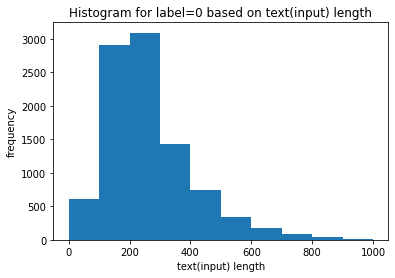

In [ ]:
plt.hist(dpm.train_task1_df[dpm.train_task1_df.label == 0]["text_len"], range=(0, 1000))
plt.title("Histogram for label=0 based on text(input) length")
plt.xlabel("text(input) length")
plt.ylabel("frequency")
plt.show()

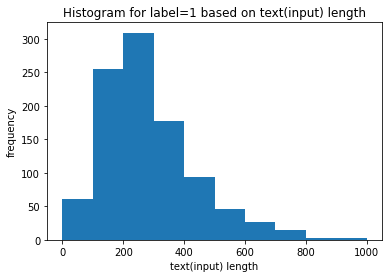

In [ ]:
plt.hist(dpm.train_task1_df[dpm.train_task1_df.label == 1]["text_len"], range=(0, 1000))
plt.title("Histogram for label=1 based on text(input) length")
plt.xlabel("text(input) length")
plt.ylabel("frequency")
plt.show()

In [12]:
train_rows = [] # will contain par_id, label and text
for idx in range(len(trids)):  
  parid = trids.par_id[idx]
  
  # select row from original dataset to retrieve `text` and binary label
  text = dpm.train_task1_df.loc[dpm.train_task1_df.par_id == parid].text.values[0]
  label = dpm.train_task1_df.loc[dpm.train_task1_df.par_id == parid].label.values[0]
  train_rows.append({
      'par_id':parid,
      'text':text,
      'label':label
  })

In [13]:
train_df = pd.DataFrame(train_rows)
train_df

,par_id,text,label
0,4341,"The scheme saw an estimated 150,000 children f...",1
1,4136,Durban 's homeless communities reconciliation ...,1
2,10352,The next immediate problem that cropped up was...,1
3,8279,Far more important than the implications for t...,1
4,1164,To strengthen child-sensitive social protectio...,1
...,...,...,...
8370,8380,Rescue teams search for survivors on the rubbl...,0
8371,8381,The launch of ' Happy Birthday ' took place la...,0
8372,8382,"The unrest has left at least 20,000 people dea...",0
8373,8383,You have to see it from my perspective . I may...,0


In [14]:
dev_rows = [] # will contain par_id, label and text
for idx in range(len(teids)):  
  parid = teids.par_id[idx]
  
  # select row from original dataset
  text = dpm.train_task1_df.loc[dpm.train_task1_df.par_id == parid].text.values[0]
  label = dpm.train_task1_df.loc[dpm.train_task1_df.par_id == parid].label.values[0]
  dev_rows.append({
      'par_id':parid,
      'text':text,
      'label':label
  })

In [15]:
dev_df = pd.DataFrame(dev_rows)
dev_df

,par_id,text,label
0,4046,We also know that they can benefit by receivin...,1
1,1279,Pope Francis washed and kissed the feet of Mus...,1
2,8330,Many refugees do n't want to be resettled anyw...,1
3,4063,"""Budding chefs , like """" Fred """" , """" Winston ...",1
4,4089,"""In a 90-degree view of his constituency , one...",1
...,...,...,...
2089,10462,"The sad spectacle , which occurred on Saturday...",0
2090,10463,""""""" The Pakistani police came to our house and...",0
2091,10464,"""When Marie O'Donoghue went looking for a spec...",0
2092,10465,"""Sri Lankan norms and culture inhibit women fr...",0


In [147]:
# downsample negative instances
pcl_df = train_df[train_df.label==1]
npos = len(pcl_df)

training_set1 = pd.concat([pcl_df, train_df[train_df.label==0][:npos*5]])
training_set1

,par_id,text,label
0,4341,"The scheme saw an estimated 150,000 children f...",1
1,4136,Durban 's homeless communities reconciliation ...,1
2,10352,The next immediate problem that cropped up was...,1
3,8279,Far more important than the implications for t...,1
4,1164,To strengthen child-sensitive social protectio...,1
...,...,...,...
4759,4391,He said the home for disabled children relied ...,0
4760,4392,"AC , through Ayala Foundation , operates Cente...",0
4761,4394,"To me , having any kind of interest in sex was...",0
4762,4395,""""""" Because it was easier and cheaper than Eur...",0


In [23]:
# first, we need to create the res/ and ref/ folders, which the evaluator expects
!mkdir ref res

mkdir: cannot create directory ‘ref’: File exists
mkdir: cannot create directory ‘res’: File exists


In [105]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

In [291]:
labels2file([[k] for k in dev_df.label.to_list()], os.path.join('ref/', 'task1.txt'))

In [148]:
task1_model_args = ClassificationArgs(num_train_epochs=5, 
                                      no_save=True, 
                                      no_cache=True, 
                                      overwrite_output_dir=True)

In [154]:
all_preds = []
all_confs = []

In [ ]:
roberta_model = ClassificationModel("roberta", 
                                  'roberta-base', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)


In [113]:
# train models
roberta_model.train_model(training_set1[['text', 'label']])

  0%|          | 0/4764 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

(2980, 0.15771600396041102)

In [160]:
torch.save(roberta_model, "roberta.pth")

In [155]:
preds_roberta, confidence_roberta = roberta_model.predict(dev_df.text.tolist())

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [156]:
all_preds.append(preds_roberta)
all_confs.append(list(confidence_roberta[:,0]))
all_confs.append(list(confidence_roberta[:,1]))

In [161]:
xlnet_model = ClassificationModel("xlnet", 
                                  'xlnet-base-cased', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [162]:
xlnet_model.train_model(training_set1[['text', 'label']])

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/4764 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

(2980, 0.23167793878272877)

In [163]:
torch.save(xlnet_model, "xlnet.pth")

In [164]:
preds_xl, confidence_xl = xlnet_model.predict(dev_df.text.tolist())

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [165]:
all_preds.append(preds_xl)
all_confs.append(list(confidence_xl[:,0]))
all_confs.append(list(confidence_xl[:,1]))

In [168]:
distilbert_c_model = ClassificationModel("distilbert", 
                                  'distilbert-base-cased', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)

# distilbert_u_model = ClassificationModel("distilbert", 
#                                   'distilbert-base-uncased', 
#                                   args = task1_model_args, 
#                                   num_labels=2, 
#                                   use_cuda=cuda_available)



Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bia

In [169]:
distilbert_c_model.train_model(training_set1[['text', 'label']])

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/4764 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

(2980, 0.16581577166114878)

In [170]:
torch.save(distilbert_c_model, "dbert.pth")

In [171]:
preds_db, confidence_db = distilbert_c_model.predict(dev_df.text.tolist())

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [174]:
all_preds.append(preds_db)
all_confs.append(list(confidence_db[:,0]))
all_confs.append(list(confidence_db[:,1]))

In [175]:
# bert_u_model = ClassificationModel("bert", 
#                                   'bert-base-uncased', 
#                                   args = task1_model_args, 
#                                   num_labels=2, 
#                                   use_cuda=cuda_available)

bert_c_model = ClassificationModel("bert", 
                                  'bert-base-cased', 
                                  args = task1_model_args, 
                                  num_labels=2, 
                                  use_cuda=cuda_available)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [176]:
bert_c_model.train_model(training_set1[['text', 'label']])

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:586: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/4764 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/596 [00:00<?, ?it/s]

(2980, 0.2513917823265863)

In [177]:
torch.save(bert_c_model, "bert.pth")

In [178]:
preds_bert, confidence_bert = bert_c_model.predict(dev_df.text.tolist())

  0%|          | 0/2094 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

In [181]:
all_preds.append(preds_bert)
all_confs.append(list(confidence_bert[:,0]))
all_confs.append(list(confidence_bert[:,1]))

In [179]:
# labels2file([[k] for k in preds_bert], os.path.join('res/', 'task1.txt'))

In [188]:
transf_dev_preds = np.array(all_preds)
transf_dev_preds = transf_dev_preds.T
transf_dev_preds.shape

(2094, 4)

In [189]:
transf_dev_preds_df = pd.DataFrame(transf_dev_preds, columns=['roberta', 'xlnet', 'dbert', 'bert'])
transf_dev_preds_df

,roberta,xlnet,dbert,bert
0,0,1,1,1
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
2089,0,0,0,0
2090,0,0,0,0
2091,0,0,0,0
2092,0,0,0,0


In [192]:
transf_dev_preds_df.to_csv("transf_dev_preds.csv", index=False)

In [190]:
transf_dev_confs = np.array(all_confs)
transf_dev_confs = transf_dev_confs.T
transf_dev_confs.shape

(2094, 8)

In [191]:
transf_dev_confs_df = pd.DataFrame(transf_dev_confs, columns=['roberta_0', 'roberta_1',  'xlnet0', 'xlnet1', 'dbert0', 'dbert1', 'bert0', 'bert1'])
transf_dev_confs_df

,roberta_0,roberta_1,xlnet0,xlnet1,dbert0,dbert1,bert0,bert1
0,3.042969,-2.794922,-3.863281,2.025391,-0.457031,0.211914,-2.326172,2.580078
1,-3.033203,3.019531,-4.183594,2.228516,-3.060547,3.197266,-2.728516,2.910156
2,3.250000,-2.988281,2.976562,-3.984375,4.191406,-4.066406,3.013672,-2.566406
3,-3.035156,3.021484,-4.199219,2.238281,-3.029297,3.199219,-2.751953,2.945312
4,3.152344,-2.892578,-0.477051,-0.629883,4.082031,-4.015625,3.408203,-3.373047
...,...,...,...,...,...,...,...,...
2089,3.250000,-2.990234,3.341797,-4.175781,4.382812,-4.355469,3.455078,-3.326172
2090,3.246094,-2.984375,2.376953,-3.369141,3.529297,-3.638672,3.185547,-2.917969
2091,3.250000,-2.988281,3.273438,-4.175781,4.386719,-4.253906,3.091797,-2.972656
2092,3.246094,-2.984375,2.242188,-3.205078,3.984375,-3.806641,2.966797,-2.525391


In [193]:
transf_dev_confs_df.to_csv("transf_dev_confs.csv", index=False)

In [207]:
train_preds = []
train_confs = []

In [208]:
models = [roberta_model, xlnet_model, distilbert_c_model, bert_c_model]

for m in models:
  preds, confs = m.predict(training_set1.text.tolist())
  train_preds.append(preds)
  train_confs.append(list(confs[:,0]))
  train_confs.append(list(confs[:,1]))

  0%|          | 0/4764 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/4764 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/4764 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

  0%|          | 0/4764 [00:00<?, ?it/s]

  0%|          | 0/596 [00:00<?, ?it/s]

In [209]:
transf_train_preds = np.array(train_preds)
transf_train_preds = transf_train_preds.T
transf_train_preds.shape

(4764, 4)

In [210]:
transf_train_preds_df = pd.DataFrame(transf_train_preds, columns=['roberta', 'xlnet', 'dbert', 'bert'])
transf_train_preds_df

,roberta,xlnet,dbert,bert
0,1,1,1,1
1,1,1,1,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
4759,0,0,0,0
4760,0,0,0,0
4761,0,0,0,0
4762,0,0,0,0


In [213]:
transf_train_preds_df.to_csv("transf_train_preds.csv", index=False)

In [214]:
transf_train_confs = np.array(train_confs)
transf_train_confs = transf_train_confs.T
transf_train_confs.shape

(4764, 8)

In [215]:
transf_train_confs_df = pd.DataFrame(transf_train_confs, columns=['roberta_0', 'roberta_1',  'xlnet0', 'xlnet1', 'dbert0', 'dbert1', 'bert0', 'bert1'])
transf_train_confs_df

,roberta_0,roberta_1,xlnet0,xlnet1,dbert0,dbert1,bert0,bert1
0,-3.029297,3.015625,-4.113281,2.136719,-3.191406,3.408203,-2.580078,2.761719
1,-3.021484,3.005859,-4.164062,2.207031,-3.175781,3.324219,1.699219,-1.769531
2,-3.035156,3.021484,-4.167969,2.201172,-3.185547,3.435547,-2.734375,2.914062
3,-3.033203,3.019531,-4.093750,2.144531,-3.187500,3.416016,-2.671875,2.851562
4,-3.033203,3.019531,-4.183594,2.224609,-3.158203,3.345703,-2.636719,2.818359
...,...,...,...,...,...,...,...,...
4759,3.253906,-2.992188,3.283203,-4.175781,4.484375,-4.375000,3.720703,-3.695312
4760,3.255859,-2.994141,3.185547,-4.121094,3.927734,-3.794922,2.980469,-2.826172
4761,3.242188,-2.980469,3.273438,-4.171875,4.230469,-4.257812,3.375000,-3.195312
4762,3.255859,-2.994141,3.173828,-4.152344,3.263672,-3.359375,3.068359,-2.603516


In [216]:
transf_train_confs_df.to_csv("transf_train_confs.csv", index=False)

Building nueralnet model for prediction.

In [292]:
import torch
from torch import nn

In [293]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 2)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

Using cuda device


In [375]:
def train(train_feature, train_label, model, loss_fn, optimizer, batch_size):
    model.train()
    for i in range(batch_size,len(train_feature),batch_size):
        X = train_feature.iloc[i-batch_size:i,:]
        y = train_label[i-batch_size:i]
        
        X = torch.tensor(X.values).to(device)
        y = torch.tensor(y).to(device)

        # Compute prediction error
        pred = model(X.float())
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
          print("iter:",i)
          print("loss:", loss.item())

In [269]:
# train(transf_train_confs_df, training_set1.label.tolist(), model, loss_fn, optimizer, 64)

In [300]:
def test(test_feature, model):
    model.eval()

    X = torch.tensor(test_feature.values).to(device)
    pred = model(X.float())
    pred = pred.argmax(1).tolist()

    return pred

In [287]:
# test(transf_dev_confs_df, model)

In [376]:
# Training Loop
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(transf_train_confs_df, training_set1.label.tolist(), model, loss_fn, optimizer, 16)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=2, bias=True)
  )
)
Epoch 1
-------------------------------
iter: 400
loss: 0.45565658807754517
iter: 800
loss: 0.7823880910873413
iter: 1200
loss: 0.8363673686981201
iter: 1600
loss: 0.6020604968070984
iter: 2000
loss: 0.4668808579444885
iter: 2400
loss: 0.35311177372932434
iter: 2800
loss: 0.27483701705932617
iter: 3200
loss: 0.21655482053756714
iter: 3600
loss: 0.17720898985862732
iter: 4000
loss: 0.14976339042186737
iter: 4400
loss: 0.12099458277225494
Epoch 2
-------------------------------
iter: 400
loss: 0.3871902823448181
iter: 800
loss: 0.25649452209472656
iter: 1200
loss: 0.09052889794111252
iter: 1600
loss: 0.07893617451190948
iter: 2000
loss: 0.07356798648834229
iter: 2400
loss: 0.0623902902007103
iter: 2800
loss: 0.05471260845661163


Testing Loop

In [377]:
test_nn_preds = test(transf_dev_confs_df, model)
labels2file([[k] for k in test_nn_preds], os.path.join('res/', 'task1.txt'))

In [378]:
test_nn_preds[:10] # sanity check

[1, 1, 0, 1, 0, 0, 1, 1, 0, 0]

In [380]:
torch.save(model, "nn_model.pth")

In [379]:
!python3 evaluation.py . .

In [386]:
header_list = ["par_id",	"art_id",	"keyword",	"country",	"text"]
final_test_df = pd.read_csv("task4_test.tsv", delimiter='\t', header=None, names=header_list)
final_test_df

,par_id,art_id,keyword,country,text
0,t_0,@@7258997,vulnerable,us,"In the meantime , conservatives are working to..."
1,t_1,@@16397324,women,pk,In most poor households with no education chil...
2,t_2,@@16257812,migrant,ca,The real question is not whether immigration i...
3,t_3,@@3509652,migrant,gb,"In total , the country 's immigrant population..."
4,t_4,@@477506,vulnerable,ca,"Members of the church , which is part of Ken C..."
...,...,...,...,...,...
3827,t_3893,@@20319448,migrant,jm,In a letter dated Thursday to European Commiss...
3828,t_3894,@@9990672,poor-families,au,They discovered that poor families with health...
3829,t_3895,@@37984,migrant,ca,"She married at 19 , to Milan ( Emil ) Badovina..."
3830,t_3896,@@9691377,immigrant,us,The United Kingdom is n't going to devolve int...


In [387]:
test_confs = []

In [388]:
_, conf_r = roberta_model.predict(final_test_df.text.tolist())
_, conf_xl = xlnet_model.predict(final_test_df.text.tolist())
_, conf_db = distilbert_c_model.predict(final_test_df.text.tolist())
_, conf_b = bert_c_model.predict(final_test_df.text.tolist())

  0%|          | 0/3832 [00:00<?, ?it/s]

  0%|          | 0/479 [00:00<?, ?it/s]

  0%|          | 0/3832 [00:00<?, ?it/s]

  0%|          | 0/479 [00:00<?, ?it/s]

  0%|          | 0/3832 [00:00<?, ?it/s]

  0%|          | 0/479 [00:00<?, ?it/s]

  0%|          | 0/3832 [00:00<?, ?it/s]

  0%|          | 0/479 [00:00<?, ?it/s]

In [389]:
test_confs.append(list(conf_r[:,0]))
test_confs.append(list(conf_r[:,1]))

test_confs.append(list(conf_xl[:,0]))
test_confs.append(list(conf_xl[:,1]))

test_confs.append(list(conf_db[:,0]))
test_confs.append(list(conf_db[:,1]))

test_confs.append(list(conf_b[:,0]))
test_confs.append(list(conf_b[:,1]))

In [390]:
transf_test_confs = np.array(test_confs)
transf_test_confs = transf_test_confs.T
transf_test_confs.shape

(3832, 8)

In [391]:
transf_test_confs_df = pd.DataFrame(transf_test_confs, columns=['roberta_0', 'roberta_1',  'xlnet0', 'xlnet1', 'dbert0', 'dbert1', 'bert0', 'bert1'])
transf_test_confs_df

,roberta_0,roberta_1,xlnet0,xlnet1,dbert0,dbert1,bert0,bert1
0,3.255859,-2.994141,3.396484,-4.179688,4.355469,-4.378906,3.660156,-3.728516
1,2.107422,-1.834961,2.425781,-3.355469,2.396484,-2.521484,-2.185547,2.468750
2,3.253906,-2.992188,3.353516,-4.183594,4.367188,-4.238281,3.667969,-3.666016
3,3.255859,-2.994141,3.400391,-4.171875,4.234375,-4.156250,3.746094,-3.787109
4,3.248047,-2.984375,3.404297,-4.171875,4.425781,-4.363281,3.634766,-3.648438
...,...,...,...,...,...,...,...,...
3827,3.242188,-2.980469,3.013672,-4.042969,4.417969,-4.464844,3.478516,-3.371094
3828,3.226562,-2.964844,2.591797,-3.625000,3.404297,-3.482422,3.044922,-2.642578
3829,3.255859,-2.996094,3.427734,-4.187500,4.417969,-4.300781,3.556641,-3.539062
3830,3.251953,-2.988281,3.335938,-4.191406,4.226562,-4.156250,3.427734,-3.406250


In [392]:
transf_test_confs_df.to_csv("transf_test_confs.csv", index=False)

In [393]:
test_nn_preds = test(transf_test_confs_df, model)
labels2file([[k] for k in test_nn_preds], os.path.join('res/', 'task1.txt'))
